In [85]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import pandas as pd
import pickle
import numpy.linalg as linalg
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
import seaborn
from random import shuffle
from numpy.random import choice
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from scipy import ndarray
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from sklearn import preprocessing
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage.feature import local_binary_pattern
import torchvision.models as models
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras as keras
import cv2
import tensorflow as tf

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [4]:
#Cross validation 
def cross_validation_gaussian(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
#         clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(copy.deepcopy(np.array(valid_train_data)), copy.deepcopy(np.array(valid_train_label)))
        clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [5]:
#Cross validation 
def cross_validation_svm(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
#         clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(copy.deepcopy(np.array(valid_train_data)), copy.deepcopy(np.array(valid_train_label)))
#         clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        clf = svm.SVC(gamma=0.001,probability=True)
        clf.fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [6]:
#Cross validation 
def cross_validation_logistic(train_new,train_label2,train_size):

    fold=5
    model=[]
    score_set=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):
        valid_test_data=[]
        valid_test_label=[]
        valid_train_data=[]
        valid_train_label=[]
        if (max(len(train_new),length)==length):
            length=len(train_new)
#         print("Counter : ",counter)
#         print("End : ",length)
        for j in range(counter,length):
            valid_test_data.append(train_new[j])
            valid_test_label.append(train_label2[j])
        counter=counter+newlength
        length=length+newlength
        valid_test_data=valid_test_data
        valid_test_label=valid_test_label
        for j in range(len(train_new)):
            if train_new[j] not in valid_test_data:
                valid_train_data.append(train_new[j])
                valid_train_label.append(train_label2[j])
#         print(q)
#         print("Data : ",valid_train_data)
        clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(np.array(valid_train_data), np.array(valid_train_label))
#         clf = GaussianNB().fit(np.array(valid_train_data), np.array(valid_train_label))
        a=[]
        a=clf.predict(np.array(valid_test_data))
        score=clf.score(np.array(valid_test_data),np.array(valid_test_label))
        score_set.append(score)
        model.append(clf) 
        del clf


    return model,score_set
    
    

In [7]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [8]:
# os.chdir('Project')

In [131]:
pwd

'/home/suraj18025/SML_Project'

In [132]:
data= pickle.load(open("master_data.pickled", "rb"))

In [133]:
len(data)

19370

In [134]:
# train_label=df['gender'].tolist()
# train_data=df['pixels'].tolist()
train_label=[]
train_data=[]
for i in range(len(data)):
    train_label.append(data[i][2])
    train_data.append(data[i][3].tolist())

In [135]:
fold=5
train_size=len(train_data)
valid_size=int(train_size/float(fold))

In [136]:
def convert(temp):
    temp1=[int(temp[i]) for i in range(len(temp))]
    return temp1

In [137]:
main_data_set=[]
for i in range(len(train_data)):
    temp=[]
    temp.append(train_data[i])
    temp.append(train_label[i])
    main_data_set.append(temp)


In [138]:
#Size of  train image and test image
train_size=int(0.8*len(main_data_set))
test_size=int(0.2*len(main_data_set))
#Spliting the dataset 
shuffled_data=random.sample(main_data_set, len(main_data_set))
X_train=shuffled_data[:train_size]
X_test=shuffled_data[train_size:]

In [139]:
train_data=[]
train_label=[]
for i in range(len(X_train)):
    train_data.append(X_train[i][0])
    train_label.append(X_train[i][1])

In [140]:
test_data=[]
test_label=[]
for i in range(len(X_test)):
    test_data.append(X_test[i][0])
    test_label.append(X_test[i][1])

In [141]:
fold=5
train_size=len(train_data)
valid_size=int(train_size/float(fold))

In [142]:
def convert1(label):
    if label=='f':
        return 1
    return 0

In [143]:
test=[]
train=[]

for i in range(len(test_label)):
    test.append(convert1(test_label[i]))
for i in range(len(train_label)):
    train.append(convert1(train_label[i]))
test_label=copy.deepcopy(test)
train_label=copy.deepcopy(train)

# Visualization of Data

In [374]:
#Visualization of Data 
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [58]:
# #Visualisation of Data 

# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# train_data1=pca.fit_transform(np.array(train_data))
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(np.array(train_data1))

In [59]:
# fashion_scatter(tsne_results, np.array(train_label))

In [144]:
#Quantile transform
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)                             
train_data1=quantile_transformer.fit_transform(train_data).tolist()
test_data1=quantile_transformer.transform(test_data).tolist()

In [392]:
#Edges as Feature
train_data1=[]
for i in range(len(train_data)):
    gray=np.array(train_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),1)
    equ=gray-blur
   
    train_data1.append(equ.ravel().tolist())
test_data1=[]
for i in range(len(test_data)):
    gray=np.array(test_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),1)
    equ=gray-blur
   
    test_data1.append(equ.ravel().tolist())

In [147]:
#Histogram Equilisation
train_data1=[]
for i in range(len(train_data)):
    gray=np.array(train_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)
    train_data1.append(equ.ravel().tolist())
test_data1=[]
for i in range(len(test_data)):
    gray=np.array(test_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)
    test_data1.append(equ.ravel().tolist())

In [148]:
#PCA 
pca = PCA(n_components=30)
train_data1=pca.fit_transform(np.array(train_data1))
test_data1=pca.transform(np.array(test_data1))

In [146]:
main_test_data=test_data1
main_train_data=train_data1

In [ ]:
# main_test_data=np.hstack((main_test_data,test_data1))
# main_train_data=np.hstack((main_train_data,train_data1))

In [261]:
# #RGB2HSV Equilisation
# train_data1=[]
# for i in range(len(train_data)):
#     gray=np.array(train_data[i],dtype = np.uint8).reshape(48,48,3)
#     gray = cv2.cvtColor(gray, cv2.COLOR_BGR2HSV)
    
#     train_data1.append(gray.ravel().tolist())
# test_data1=[]
# for i in range(len(test_data)):
#     gray=np.array(test_data[i],dtype = np.uint8).reshape(48,48,3)
#     gray = cv2.cvtColor(gray, cv2.COLOR_BGR2HSV)
#     test_data1.append(gray.ravel().tolist())

In [104]:
#LBP feature 
radius=3
n_points=8*radius
METHOD="uniform"
train_data1=[]
for i in range(len(train_data)):
    gray=np.array(train_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, METHOD)
    train_data1.append(lbp.ravel().tolist())
test_data1=[]
for i in range(len(test_data)):
    gray=np.array(test_data[i],dtype = np.uint8).reshape(48,48,3)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, METHOD)
    test_data1.append(lbp.ravel().tolist())

In [105]:
#PCA 
pca = PCA(n_components=30)
train_data1=pca.fit_transform(np.array(train_data1))
test_data1=pca.transform(np.array(test_data1))

In [51]:
#USed for eigen faces
pca = PCA(n_components=10, svd_solver='randomized',
          whiten=True).fit(train_data1)
eigenfaces = pca.components_.reshape((10, 48, 48))

In [149]:
main_test_data=np.hstack((main_test_data,test_data1))
main_train_data=np.hstack((main_train_data,train_data1))

In [ ]:
main_train_data=copy.deepcopy(train_data1)
main_test_data=copy.deepcopy(test_data1)

In [106]:
main_train_data=(train_data1)
main_test_data=(test_data1)

In [150]:
#Hog Feature
train_data1=[]
for i in range(len(train_data)):
    gray=np.array(train_data[i]).reshape(48,48,3)
    fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True,multichannel=True)
    train_data1.append(fd)
test_data1=[]
for i in range(len(test_data)):
    gray=np.array(test_data[i]).reshape(48,48,3)
    fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True,multichannel=True)
    test_data1.append(fd)




In [151]:
#PCA 
pca = PCA(n_components=30)
train_data1=pca.fit_transform(np.array(train_data1))
test_data1=pca.transform(np.array(test_data1))

In [202]:
a=copy.deepcopy(main_train_data)
b=copy.deepcopy(main_test_data)

In [152]:
main_test_data=np.hstack((main_test_data,test_data1))
main_train_data=np.hstack((main_train_data,train_data1))

In [205]:

# for i in range(len(test_data1)):
#     main_test_data[i]+=list(test_data1[i])
# for i in range(len(train_data1)):
#     main_train_data[i]+=list(train_data1[i])

In [467]:
pwd

'/home/suraj18025/SML_Project'

In [468]:
os.chdir('data')

In [469]:
# For CNN
#Writing into directory named as data
s="Image@"
g=".jpg"
counter=0
for i in range(len(train_data)):
    counter+=1
    f=os.listdir()
    if str(train_label[i]) not in f:
        os.mkdir(str(train_label[i]))
        img=np.array(train_data[i],dtype=np.uint8).reshape(48,48,3)
        os.chdir(str(train_label[i]))
#         plt.imshow(np.array(train_data[i]).reshape(48,48))
        cv2.imwrite(s+str(counter)+g,img/np.max(img)*255)
        os.chdir('..')
    else:
        img=np.array(train_data[i],dtype=np.uint8).reshape(48,48,3)
        os.chdir(str(train_label[i]))
        cv2.imwrite(s+str(counter)+g,img/np.max(img)*255)
        os.chdir('..')
        

In [472]:
os.chdir('testdata')

In [471]:
pwd

'/home/suraj18025/SML_Project'

In [473]:
#Writing into directory named as testdata
s="Image#"
g=".jpg"
counter=0
for i in range(len(test_data)):
    counter+=1
    f=os.listdir()
    if str(test_label[i]) not in f:
        os.mkdir(str(test_label[i]))
        img=np.array(test_data[i],dtype=np.uint8).reshape(48,48,3)
        os.chdir(str(test_label[i]))
#         plt.imshow(np.array(train_data[i]).reshape(48,48))
        cv2.imwrite(s+str(counter)+g,img/np.max(img)*255)
        os.chdir('..')
    else:
        img=np.array(test_data[i],dtype=np.uint8).reshape(48,48,3)
        os.chdir(str(test_label[i]))
        cv2.imwrite(s+str(counter)+g,img/np.max(img)*255)
        os.chdir('..')
        

In [24]:
import torch.utils.data as data

from PIL import Image
import os
import os.path

def default_loader(path):
	return Image.open(path).convert('RGB')

def default_flist_reader(flist):
    """
    flist format: impath label\nimpath label\n ...(same to caffe's filelist)
    """
    imlist = []
    os.chdir(flist)
    f=os.listdir()
    for i in range(len(f)):
        os.chdir(f[i])
        g=os.listdir()
        for j in range(len(g)):
            imlist.append(((os.getcwd()+str('/')+str(g[j])), int(f[i])))

        os.chdir('..')

    return imlist
class ImageFilelist(data.Dataset):
	def __init__(self, root, flist, transform=None, target_transform=None,
			flist_reader=default_flist_reader, loader=default_loader):
		self.root   = root
		self.imlist = flist_reader(flist)		
		self.transform = transform
		self.target_transform = target_transform
		self.loader = loader

	def __getitem__(self, index):
		impath, target = self.imlist[index]
		img = self.loader(os.path.join(self.root,impath))
		if self.transform is not None:
			img = self.transform(img)
		if self.target_transform is not None:
			target = self.target_transform(target)
		
		return img, target

	def __len__(self):
		return len(self.imlist)

In [42]:
os.chdir('..')

In [43]:
transform = transforms.Compose(
    [transforms.Resize(224),transforms.ToTensor()])
trainloader = torch.utils.data.DataLoader(ImageFilelist(root="./data/", flist="./data/",
                                                         transform=transform),batch_size=4,
                                          shuffle=True, num_workers=2)
os.chdir('..')
testloader = torch.utils.data.DataLoader(ImageFilelist(root="./testdata/", flist="./testdata/",
                                                         transform=transform),batch_size=4,
                                          shuffle=True, num_workers=2)


In [44]:
classes = (0,1)

In [45]:
vgg16 = models.vgg16(pretrained=True)
vgg16.to("cuda:0")

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [46]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
train_data=[]
train_label=[]
for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs,labels=data
    inputs,labels=inputs.to("cuda:0"), labels.to("cuda:0")

    outputs = vgg16(inputs)
    g=outputs.cpu().detach().numpy().tolist()
    h=labels.cpu().numpy().tolist()
    for j in range(len(g)):

        train_data.append(g[j])
        train_label.append(h[j])
#         print(h[i])
   


In [47]:
test_data=[]
test_label=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to("cuda:0"), labels.to("cuda:0")
        outputs = vgg16(images)
        g=outputs.cpu().numpy().tolist()
        h=labels.cpu().numpy().tolist()
        for i in range(len(g)):
            test_data.append(g[i])
            test_label.append(h[i])

In [48]:
train_size=len(train_data)

In [110]:
# Cross Validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import csv
from xgboost import XGBClassifier


In [111]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X, y) 

In [153]:
train_data=main_train_data
test_data=main_test_data

In [154]:
X_train, X_test, y_train = np.array(train_data),np.array(test_data),np.array(train_label)

In [39]:
main_train_data=train_data
main_test_data=test_data

In [53]:
test_data=np.hstack((main_test_data,test_data))
train_data=np.hstack((main_train_data,train_data))

In [155]:
kf=KFold(n_splits=5)
model=[]
score_set1=[]
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    valid_train_data, valid_test_data = X_train[train_index], X_train[test_index]
    valid_train_label, valid_test_label = y_train[train_index], y_train[test_index]
    
    clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial')
    clf.fit(np.array(valid_train_data),np.array(valid_train_label))

    b=clf.predict(np.array(valid_test_data))

    score1=clf.score(valid_test_data,valid_test_label)
    print("Accuracy ",score1)
    score_set1.append(score1)
    model.append(clf) 

TRAIN: [ 3100  3101  3102 ... 15493 15494 15495] TEST: [   0    1    2 ... 3097 3098 3099]
Accuracy  0.6841935483870968
TRAIN: [    0     1     2 ... 15493 15494 15495] TEST: [3100 3101 3102 ... 6196 6197 6198]
Accuracy  0.691513391416586
TRAIN: [    0     1     2 ... 15493 15494 15495] TEST: [6199 6200 6201 ... 9295 9296 9297]
Accuracy  0.6708615682478218
TRAIN: [    0     1     2 ... 15493 15494 15495] TEST: [ 9298  9299  9300 ... 12394 12395 12396]
Accuracy  0.6798967408841562
TRAIN: [    0     1     2 ... 12394 12395 12396] TEST: [12397 12398 12399 ... 15493 15494 15495]
Accuracy  0.7008712487899322


In [156]:
score_mean=np.mean(score_set1)
standard_dev=np.std(score_set1)
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set1)
best=model[np.argmax(score_set1)]
best_score6=best.score(np.array(test_data),np.array(test_label))
prob_dist6=best.predict_proba(test_data)
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score6)


Standard deviation :  0.010196252564463453
Mean of accuracy : 0.6854672995451185
Accuracy for each validation :  [0.6841935483870968, 0.691513391416586, 0.6708615682478218, 0.6798967408841562, 0.7008712487899322]
Test Accuracy by best model in cross validation :  0.6768198244708312


In [157]:
y_true=test_label
y_pred=label_pred
print("Macro Precision ",precision_score(y_true, y_pred, average='macro'))
print("Micro Precision ",precision_score(y_true, y_pred, average='micro'))
print("Macro Recall ",recall_score(y_true, y_pred, average='macro'))
print("Micro Recall ",recall_score(y_true, y_pred, average='micro'))
print("Macro F1 measure  ",precision_recall_fscore_support(y_true, y_pred, average='macro')[2])
print("Micro F1 measure ",precision_recall_fscore_support(y_true, y_pred, average='micro')[2])

Macro Precision  0.6757146928959592
Micro Precision  0.6768198244708312
Macro Recall  0.6752056316262979
Micro Recall  0.6768198244708312
Macro F1 measure   0.6753800469463459
Micro F1 measure  0.6768198244708312


In [113]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [115]:
def find_tpr_fpr(predict,real,checker):
    tp=0
    tn=0
    fp=0
#     print("find_tpr_fpr")
    fn=0
    voc=copy.deepcopy([0,1])
    v=voc.index(checker)
    del voc[v]
    for i in range(len(predict)):
        if predict[i]==checker and real[i]==checker:
            tp=tp+1
        if (predict[i] in voc ) and real[i]==checker:
            fn=fn+1
        if predict[i]==checker and (real[i] in voc):
            fp=fp+1
        if (predict[i] in voc) and (real[i] in voc):
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=float(tp/float(tp+fn))   
    fpr2=float(fp/float(fp+tn))
    
    return tpr2,fpr2

In [119]:
def roc_design(prob_dist,testdata,checker):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
        
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]

    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(checker)
    i=0
    #Logic 
    if (checker+1)==2:
        flag=checker-1
    else:
        flag=checker+1
        
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        j=0
        
        while (j  <= i):
            main2[j]=flag
            j=j+1
        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1),checker)
        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+1
    return tpr,fpr


0


No handles with labels found to put in legend.


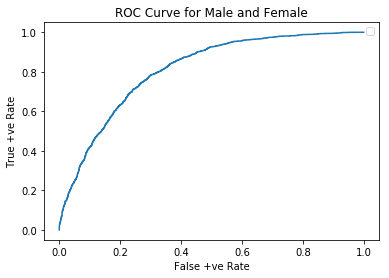

In [211]:
# ROC Curve 
prob_dist=np.transpose(prob_dist6)
for i in range(1):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr)
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

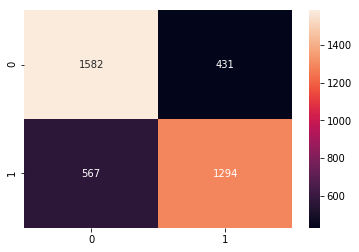

In [212]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

# SVM

In [ ]:
model,score_set=cross_validation_svm(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

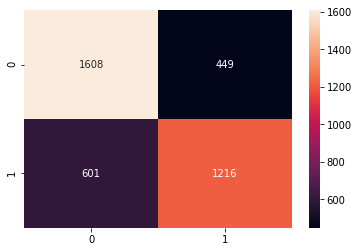

In [107]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# Naive Bayes

In [60]:
model,score_set=cross_validation_gaussian(train_data,train_label,train_size)

In [61]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

Standard deviation :  0.009042675734710725
Mean of accuracy : 0.5956927637756806
Accuracy for each validation :  [0.599188790560472, 0.5800147492625368, 0.5977138643067846, 0.6076696165191741, 0.5938767982294356]
Test Accuracy by best model in cross validation :  0.5885389778007227


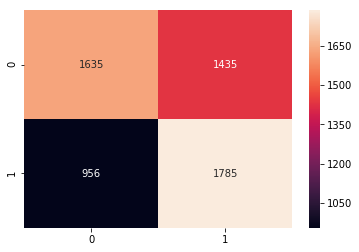

In [62]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# Logistic Regreesion

In [ ]:
model,score_set=cross_validation_logistic(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

In [ ]:
test=[]
pred=[]
for i in range(len(test_label)):
    test.append(convert1(test_label[i]))
    pred.append(convert1(label_pred[i]))
test_label=copy.deepcopy(test)
label_pred=copy.deepcopy(pred)

In [ ]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

In [ ]:
temp=[]
for i in range(len(train_label)):
    if train_label[i]=='f':
        temp.append(1)
    else:
        temp.append(0)
train_label=copy.deepcopy(temp)

# Neural Network

In [ ]:
x_train=np.array(train_data)
y_train=np.array(train_label)
x_test=np.array(test_data)
y_test=np.array(test_label)

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

# Adaboosting

In [ ]:
def adaboost(n,train_data1,train_label1,test_data,test_label,weights,d):
    
    alpha_k=[]
    Ck=[]
    nat=[i for i in range(len(train_data1))]
    main_data=copy.deepcopy(train_data1)
    main_label=copy.deepcopy(train_label1)
    
    for i in range(n):
        print(i)
#         print("Hello : ",i)
        sample = choice(nat, d,p=weights,replace=False)
#         sample = choice(nat,d,weights,replace=False)
        train_data=[]
        train_label=[]
        for j in range(len(sample)):
            train_data.append(train_data1[sample[j]])
            train_label.append(train_label1[sample[j]])
        
        clf=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10)
        clf.fit(np.array(train_data),np.array(train_label))
        predict1=clf.predict(np.array(main_data))
        h=labelling(predict1.tolist(),main_label)
        train_err=clf.score(np.array(train_data),np.array(train_label))
        train_err=1-train_err
        alpha=0.5*np.log((1-train_err)/float(train_err))+np.log(25)
        alpha_k.append(alpha)
        Ck.append(clf)
#         print("Hello1 : ",i)
        for j in range(len(weights)):
            
            if h[j]==1:
                
                weights[j]=weights[j]*math.exp((-1)*alpha)
            else:
                weights[j]=weights[j]*math.exp(alpha)
        w=copy.deepcopy(weights)
        total=np.sum(w)
        for j in range(len(weights)):
            weights[j]=weights[j]/float(total)
#         print("Hello2 : ",i)
 #For test set
    test_predict=[]
    for i in range(len(test_data)):
        disc_func=[[] for i in class_label]
        for j in range(k_max):
            index=Ck[j].predict(np.array(test_data[i]).reshape(1,-1)).tolist()[0]
            if disc_func[index]==[]:
                disc_func[index].append(alpha_k[j])
            else:
                disc_func[index][0]+=alpha_k[j]
        test_predict.append(disc_func.index(max(disc_func)))

    test_acc=accuracy(test_predict,test_label)   
# For train set
    train_predict=[]
#     for i in range(len(train_data1)):
#         disc_func1=[[] for i in class_label]
#         for j in range(k_max):
#             index=Ck[j].predict(np.array(train_data1[i]).reshape(1,-1)).tolist()[0]
#             if disc_func1[index]==[]:
#                 disc_func1[index].append(alpha_k[j])
#             else:
#                 disc_func1[index][0]+=alpha_k[j]
#         train_predict.append(disc_func1.index(max(disc_func1)))

#     train_acc=accuracy(train_predict,train_label1)  
    train_acc=0
    return Ck,alpha_k,train_predict,test_predict,train_acc,test_acc
            

In [ ]:
k_max=50
d=3000
class_label=list(set(train_label))


In [ ]:
weights=[1/float(len(train_data)) for i in train_data]
Ck,alpha_k,train_result,test_result,train_acc,test_acc=adaboost(k_max,train_data,train_label,test_data,test_label,weights,d)

In [ ]:
print("Accuracy in training : ",train_acc)
print("Accuracy in testing : ",test_acc)

# Histogram as feature set

In [ ]:
def histogram(train_data):
    hist=[0]*256
    for i in range(len(train_data)):
        hist[train_data[i]]+=1
    return hist
        

In [ ]:
train_data1=[]
for i in range(len(train_data)):
    train_data1.append(histogram(train_data[i]))
test_data1=[]
for i in range(len(test_data)):
    test_data1.append(histogram(test_data[i]))



In [ ]:
train_data=copy.deepcopy(train_data1)
test_data=copy.deepcopy(test_data1)


# Logistic Regression

In [ ]:
model,score_set=cross_validation_logistic(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

In [ ]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# Naive Bayes

In [ ]:
model,score_set=cross_validation_gaussian(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

In [ ]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# SVM

In [ ]:
model,score_set=cross_validation_svm(train_data,train_label,train_size)

In [ ]:
score_mean=np.mean(np.array(score_set))
standard_dev=np.std(np.array(score_set))
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

In [ ]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

In [ ]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(2):
    print(i)
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Male and Female")
plt.show()

# Neural Network

In [ ]:
x_train=np.array(train_data)
y_train=np.array(train_label)
x_test=np.array(test_data)
y_test=np.array(test_label)

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

# Adaboosting

In [ ]:
k_max=50
d=3000
class_label=list(set(train_label))

In [ ]:
def accuracy(predict,true):
    count=0
    for i in range(len(predict)):
        if predict[i]==true[i]:
            count+=1
    return count/float(len(predict))

In [ ]:
def labelling(predict,true):
    h=[]
    for i in range(len(predict)):
        if predict[i]==true[i]:
            h.append(1)
        else:
            h.append(0)
    return h

In [ ]:
weights=[1/float(len(train_data)) for i in train_data]
Ck,alpha_k,train_result,test_result,train_acc,test_acc=adaboost(k_max,train_data,train_label,test_data,test_label,weights,d)

In [ ]:
print("Accuracy in training : ",train_acc)
print("Accuracy in testing : ",test_acc)

In [ ]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0]
for i in range(2):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][test_result[i]]=confusionmatrix[test_label[i]][test_result[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

# Bagging

In [ ]:
a=[[1749,1252],[1248,1562]]

In [ ]:
seaborn.heatmap(a,annot=True,fmt="d")   